In [500]:
import numpy as np
import matplotlib.pyplot as plt


rawData = np.load(r"C:\Users\harri\Desktop\Cs 437\FinalProj\data_12_06_2023_23_27_20.npy")
rawDataBaseline = np.load(r"C:\Users\harri\Desktop\Cs 437\FinalProj\data_12_06_2023_20_37_13.npy")
rawDataRight = np.load(r"C:\Users\harri\Desktop\Cs 437\FinalProj\data_12_06_2023_23_50_06.npy")
rawDataLeft = np.load(r"C:\Users\harri\Desktop\Cs 437\FinalProj\data_12_06_2023_23_51_56.npy")
rawDataBoth = np.load(r"C:\Users\harri\Desktop\Cs 437\FinalProj\data_12_06_2023_22_47_18.npy")
rawDataRightMetal = np.load(r"C:\Users\harri\Desktop\Cs 437\FinalProj\data_12_06_2023_22_50_33.npy")

uniformData = np.array([frame["adcSamples"][:, 128:] for frame in rawData])
dataBaseline = np.array([frame["adcSamples"][:, 128:] for frame in rawDataBaseline])
dataRight = np.array([frame["adcSamples"][:, 128:] for frame in rawDataRight])
dataLeft = np.array([frame["adcSamples"][:, 128:] for frame in rawDataLeft])
dataBoth = np.array([frame["adcSamples"][:, 128:] for frame in rawDataBoth])
dataRightMetal = np.array([frame["adcSamples"][:, 128:] for frame in rawDataRightMetal])




SyntaxError: invalid syntax (795758852.py, line 19)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


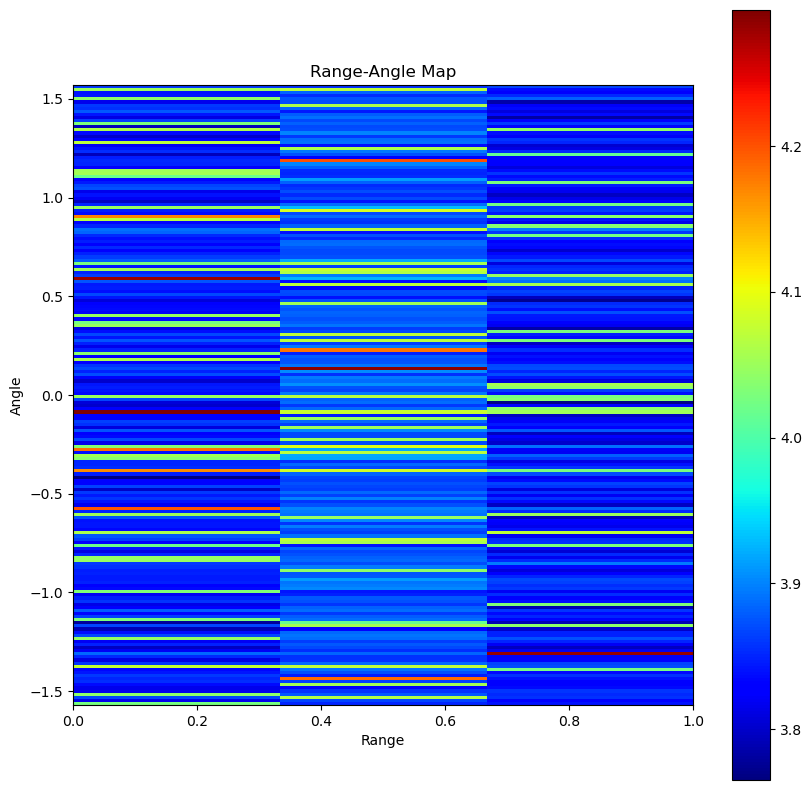

[(845.7756022816503-400.06332880415215j), (846.1552173462652-365.66332082361083j), (908.083250488455-246.23471932604065j), (833.0461694975577-373.7611932401304j), (842.1366423117742-376.1449050170031j), (834.414430625864-365.21077248955817j), (849.4852907522736-346.74811855238477j), (850.9171913731398-395.9826514170413j), (842.3263230000607-376.3606444431784j), (819.4920730803543-367.02700054688523j), (826.3866162525445-390.37367323217694j), (845.7578805855313-367.4678775729441j), (845.6301720594239-377.95082023252365j), (851.5284629430835-263.7618153316363j), (830.6673284297098-382.3133778559025j), (864.9903489960146-369.88610677080925j), (831.3443714327076-385.3555126206666j), (900.2675962847986-381.9537321234417j), (854.4177252713274-383.3295008474573j), (813.9305803043297-388.1048080571125j), (826.8541728244592-383.5676157034669j), (804.6725704583323-358.35542036942155j), (813.0054597941094-395.373971783621j), (843.8030149999588-369.3730119440141j), (818.4521091251067-328.642698564

TypeError: Image data of dtype complex128 cannot be converted to float

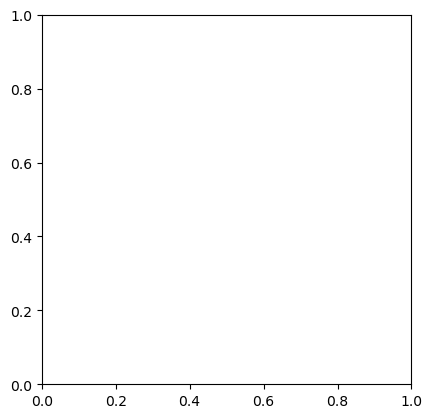

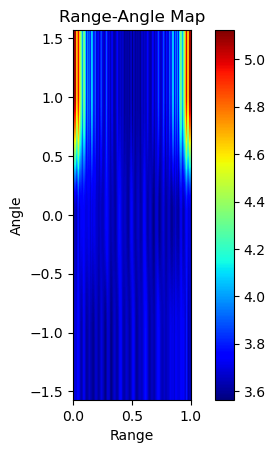

In [487]:
import numpy as np
import matplotlib.pyplot as plt
# baseline

# Assuming data is your raw data cube: (#chirps, #antennas, #samples)

# Step 1: Pre-processing (if needed)
speed_of_light = 3e8  # Speed of light in meters/second
bandwidth = 4.4e9 # Your radar's bandwidth
range_resolution = speed_of_light / (2 * bandwidth)
max_range = range_resolution * dataBaseline.shape[2]  # Maximum range based on the number of samples
range_bins = np.linspace(0, max_range, dataBaseline.shape[2])

# Step 2: Range FFT

range_fft = np.fft.fft(dataBaseline[:,:,:], axis=2)

# range selection
range_0_1_meter = np.where((range_bins >= 0) & (range_bins <= 2.5))[0]
selected_range_fft = range_fft[:, :, range_0_1_meter]

angle_fft = np.fft.fft(range_fft, axis=1)
#angle_fft = np.fft.fftshift(angle_fft, axes=1)  # Centering the beam pattern

range_bins = range_fft[0,1,:].real

angle_bins = angle_fft[0,:,0].real

# average over chirps
angle_fft_base = np.log10(np.mean(np.abs(angle_fft[range(1,angle_fft.shape[0],2),:,:]), axis=0)+1)

plt.imshow(angle_fft_base, cmap='jet',aspect = 'equal',extent = extent)  # Log scale for better visibility
plt.xlabel('Range')
plt.ylabel('Angle')
plt.title('Range-Angle Map')
plt.colorbar()

plt.show()



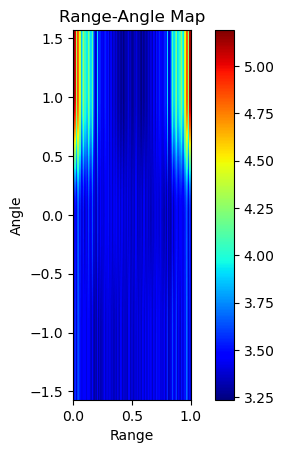

In [508]:
import numpy as np
import matplotlib.pyplot as plt
# baseline

# Assuming data is your raw data cube: (#chirps, #antennas, #samples)

# Step 1: Pre-processing (if needed)
speed_of_light = 3e8  # Speed of light in meters/second
bandwidth = 4.4e9 # Your radar's bandwidth
range_resolution = speed_of_light / (2 * bandwidth)
max_range = range_resolution * dataBoth.shape[2]  # Maximum range based on the number of samples
range_bins = np.linspace(0, max_range, dataBoth.shape[2])

# Step 2: Range FFT

range_fft = np.fft.fft(dataBoth[:,:,:], axis=2)

# range selection
range_0_1_meter = np.where((range_bins >= 0) & (range_bins <= 2.5))[0]
selected_range_fft = range_fft[:, :, range_0_1_meter]

angle_fft = np.fft.fft(range_fft, axis=1)
#angle_fft = np.fft.fftshift(angle_fft, axes=1)  # Centering the beam pattern

range_bins = range_fft[0,1,:].real

angle_bins = angle_fft[0,:,0].real

# average over chirps
angle_fft = (np.mean(np.abs(angle_fft[range(1,angle_fft.shape[0],2),:,:]), axis=0)+1)

plt.imshow((np.log10(angle_fft+1)), cmap='jet',aspect = 'equal',extent = extent)  # Log scale for better visibility
plt.xlabel('Range')
plt.ylabel('Angle')
plt.title('Range-Angle Map')
plt.colorbar()

plt.show()



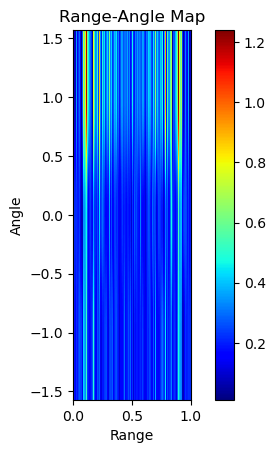

In [505]:
import numpy as np
import matplotlib.pyplot as plt
# baseline

# Assuming data is your raw data cube: (#chirps, #antennas, #samples)

# Step 1: Pre-processing (if needed)
speed_of_light = 3e8  # Speed of light in meters/second
bandwidth = 4.4e9 # Your radar's bandwidth
range_resolution = speed_of_light / (2 * bandwidth)
max_range = range_resolution * dataRight.shape[2]  # Maximum range based on the number of samples
range_bins = np.linspace(0, max_range, dataRight.shape[2])

# Step 2: Range FFT
range_fft = np.fft.fft(dataRight[:,:,:], axis=2)

# range selection
range_0_1_meter = np.where((range_bins >= 0) & (range_bins <= 2.5))[0]
selected_range_fft = range_fft[:, :, range_0_1_meter]

angle_fft = np.fft.fft(range_fft, axis=1)
#angle_fft = np.fft.fftshift(angle_fft, axes=1)  # Centering the beam pattern

range_bins = range_fft[0,1,:].real

angle_bins = angle_fft[0,:,0].real

# average over chirps
angle_fft = (np.mean(np.abs(angle_fft[range(1,angle_fft.shape[0],2),:,:]), axis=0)+1)

plt.imshow(np.abs(angle_fft_base-np.log10(angle_fft+1)), cmap='jet',aspect = 'equal',extent = extent)  # Log scale for better visibility
plt.xlabel('Range')
plt.ylabel('Angle')
plt.title('Range-Angle Map')
plt.colorbar()

plt.show()



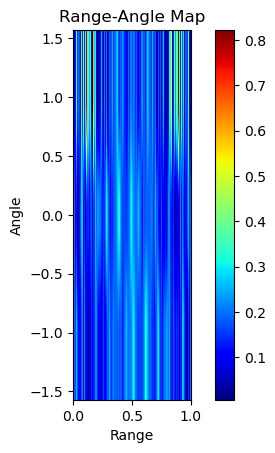

In [409]:
import numpy as np
import matplotlib.pyplot as plt
# baseline

# Assuming data is your raw data cube: (#chirps, #antennas, #samples)

# Step 1: Pre-processing (if needed)
speed_of_light = 3e8  # Speed of light in meters/second
bandwidth = 4.4e9 # Your radar's bandwidth
range_resolution = speed_of_light / (2 * bandwidth)
max_range = range_resolution * dataLeft.shape[2]  # Maximum range based on the number of samples
range_bins = np.linspace(0, max_range, dataLeft.shape[2])

# Step 2: Range FFT
range_fft = np.fft.fft(dataLeft[:,:,:], axis=2)

# range selection
range_0_1_meter = np.where((range_bins >= 0) & (range_bins <= 2.5))[0]
selected_range_fft = range_fft[:, :, range_0_1_meter]

angle_fft = np.fft.fft(range_fft, axis=1)
#angle_fft = np.fft.fftshift(angle_fft, axes=1)  # Centering the beam pattern

range_bins = range_fft[0,1,:].real

angle_bins = angle_fft[0,:,0].real

# average over chirps
angle_fft = np.mean(np.abs(angle_fft[range(1,angle_fft.shape[0],2),:,:]), axis=0)

plt.imshow(np.abs(angle_fft_base-np.log10(angle_fft+1)), cmap='jet',aspect = 'equal',extent = extent)  # Log scale for better visibility
plt.xlabel('Range')
plt.ylabel('Angle')
plt.title('Range-Angle Map')
plt.colorbar()

plt.show()



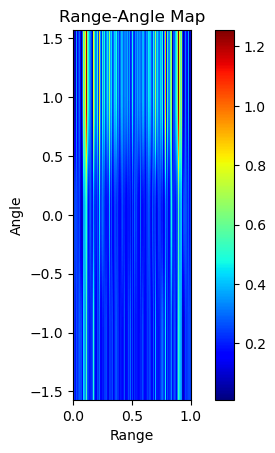

In [475]:
import numpy as np
import matplotlib.pyplot as plt
# baseline

# Assuming data is your raw data cube: (#chirps, #antennas, #samples)

# Step 1: Pre-processing (if needed)
speed_of_light = 3e8  # Speed of light in meters/second
bandwidth = 7e9 # Your radar's bandwidth
range_resolution = speed_of_light / (2 * bandwidth)
max_range = range_resolution * data.shape[2]  # Maximum range based on the number of samples
range_bins = np.linspace(0, max_range, data.shape[2])

# Step 2: Range FFT
range_fft = np.fft.fft(dataRight[:,:,:], axis=2)

# range selection
range_0_1_meter = np.where((range_bins >= 0) & (range_bins <= 0.5))[0]
selected_range_fft = range_fft[:, :, range_0_1_meter]

angle_fft = np.fft.fft(range_fft, axis=1)
#angle_fft = np.fft.fftshift(angle_fft, axes=1)  # Centering the beam pattern

range_bins = range_fft[0,1,:].real

angle_bins = angle_fft[0,:,0].real

# average over chirps
angle_fft = np.mean(np.abs(angle_fft[range(1,angle_fft.shape[0],2),:,:]), axis=0)

plt.imshow(np.abs(angle_fft_base-np.log10(angle_fft)), cmap='jet',aspect = 'equal',extent = extent)  # Log scale for better visibility
plt.xlabel('Range')
plt.ylabel('Angle')
plt.title('Range-Angle Map')
plt.colorbar()

plt.show()



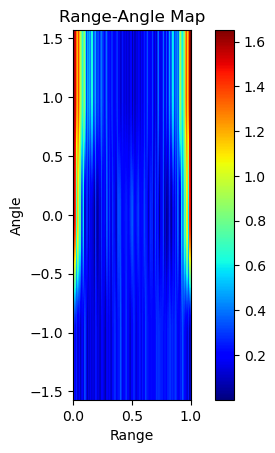

In [473]:
import numpy as np
import matplotlib.pyplot as plt
# baseline

# Assuming data is your raw data cube: (#chirps, #antennas, #samples)

# Step 1: Pre-processing (if needed)
speed_of_light = 3e8  # Speed of light in meters/second
bandwidth = 7e9 # Your radar's bandwidth
range_resolution = speed_of_light / (2 * bandwidth)
max_range = range_resolution * data.shape[2]  # Maximum range based on the number of samples
range_bins = np.linspace(0, max_range, data.shape[2])

# Step 2: Range FFT
range_fft = np.fft.fft(uniformData[:,:,:], axis=2)

# range selection
range_0_1_meter = np.where((range_bins >= 0) & (range_bins <= 2.5))[0]
selected_range_fft = range_fft[:, :, range_0_1_meter]

angle_fft = np.fft.fft(range_fft, axis=1)
angle_fft = np.fft.fftshift(angle_fft, axes=1)  # Centering the beam pattern

range_bins = range_fft[0,1,:].real

angle_bins = angle_fft[0,:,0].real

# average over chirps
angle_fft = np.mean(np.abs(angle_fft[range(1,angle_fft.shape[0],2),:,:]), axis=0)

plt.imshow(np.abs(angle_fft_base-np.log10(angle_fft+1)), cmap='jet',aspect = 'equal',extent = extent)  # Log scale for better visibility
plt.xlabel('Range')
plt.ylabel('Angle')
plt.title('Range-Angle Map')
plt.colorbar()

plt.show()

